# 2020270026 应用统计硕士 王姿文

# 1 Dimension Reduction, PCA

## Problem 1
### 1 different components

首先读取数据并来查看维度，接着将3d数据的60000笔中前25笔画出来，明显是手写数字图片（**由于此题的题目有表明需要附上code在旁边，因此附上**）：

In [14]:
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 100

In [8]:
def load_data(data_folder):

    files = [
          'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz'
    ]
    paths = []
    for fname in files:
        paths.append(os.path.join(data_folder,fname))
        
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)
        
    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    return (x_train, y_train)

#load
train_images, train_labels = load_data('/Users/wangziwen/Documents/Graduation/1st/Statistic Learning/HW/HW3/')

#dim
print('dim:',train_images.shape)

#reshape data
train_data=train_images.reshape(60000,784)

dim: (60000, 28, 28)


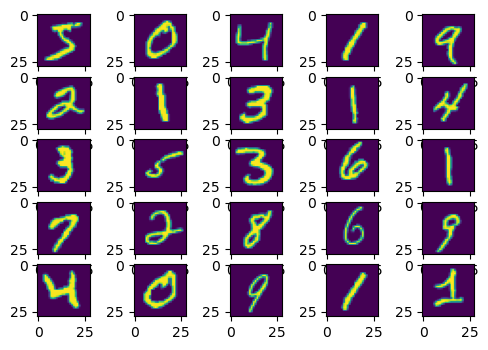

In [6]:
f, ax = plt.subplots(5, 5)
a = [i for i in range(25)]
a = np.array(a).reshape(5,5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_data[a[i][j]].reshape(28,28))

plt.show()

已知此笔数据是60000x28x28，可以转换为2d的60000x784，此时便是60000笔数据涵盖784个特征   
可以应用PCA以及PCA without centered于此笔数据，下面可以见到两种方法若要降维至累计解释变异高达99%，则会分别降为333个主成分和332个主成分

In [9]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD # without center

In [10]:
pca = PCA(n_components = 333) #np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.99)+1
train_data_pca = pca.fit_transform(train_data)
tsvd = TruncatedSVD(n_components = 332) #np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.99)+1
train_data_tsvd = tsvd.fit_transform(train_data)

In [14]:
print('PCA dim:',train_data_pca.shape,'-> reduce from 784 to 333') #784 -> 333
print('PCA without centered dim:',train_data_tsvd.shape,'-> reduce from 784 to 332')

PCA dim: (60000, 333) -> reduce from 784 to 333
PCA without centered dim: (60000, 332) -> reduce from 784 to 332


接着来看两者的累计解释变异图，其图内的点分别为累计解释变异达至5%、20%、50%、80%、95%、99%时的主成分个数：

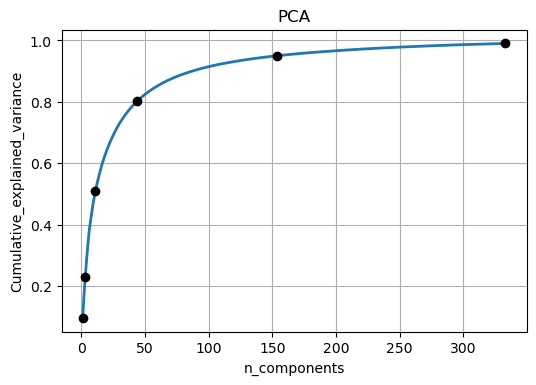

In [12]:
cumsum_pca = np.cumsum(pca.explained_variance_ratio_)
cumsum_tsvd = np.cumsum(tsvd.explained_variance_ratio_)

#1%, 5%, 20%, 50%, 80%, 95%, 99%
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot([i+1 for i in range(333)],
         cumsum_pca,linewidth=2)
plt.plot(1, cumsum_pca[0], linestyle="None", marker="o",  color="black")
plt.plot(3, cumsum_pca[2], linestyle="None", marker="o",  color="black")
plt.plot(11, cumsum_pca[10], linestyle="None", marker="o",  color="black")
plt.plot(44, cumsum_pca[43], linestyle="None", marker="o",  color="black")
plt.plot(154, cumsum_pca[153], linestyle="None", marker="o",  color="black")
plt.plot(333, cumsum_pca[332], linestyle="None", marker="o",  color="black")
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('PCA')
plt.show()

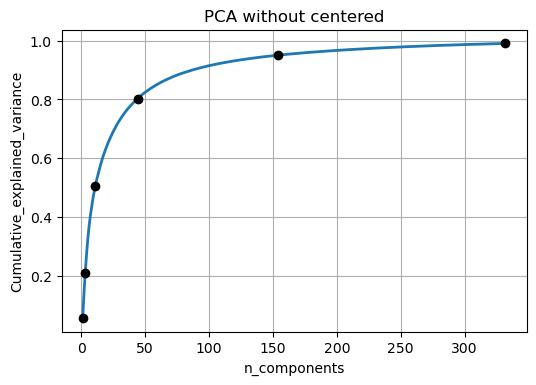

In [13]:
#1%, 5%, 20%, 50%, 80%, 95%, 99%
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot([i+1 for i in range(332)],
         cumsum_tsvd,linewidth=2)
plt.plot(1, cumsum_tsvd[0], linestyle="None", marker="o",  color="black")
plt.plot(3, cumsum_tsvd[2], linestyle="None", marker="o",  color="black")
plt.plot(11, cumsum_tsvd[10], linestyle="None", marker="o",  color="black")
plt.plot(44, cumsum_tsvd[43], linestyle="None", marker="o",  color="black")
plt.plot(154, cumsum_tsvd[153], linestyle="None", marker="o",  color="black")
plt.plot(332, cumsum_tsvd[331], linestyle="None", marker="o",  color="black")
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('PCA without centered')
plt.show()

接着设定两张图片，下图为原始数据画出来的样子，希望能用两种降维方法后的数据来绘制此两张图：

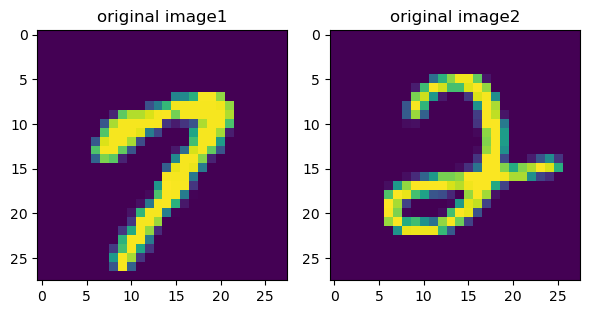

In [16]:
f, ax = plt.subplots(1, 2)

ax[0].imshow(train_data[15,:].reshape(28,28))
ax[1].imshow(train_data[16,:].reshape(28,28))
ax[0].set_title('original image1')
ax[1].set_title('original image2')
plt.tight_layout() 
plt.show()

In [15]:
def train_pca(d):
    pca = PCA(n_components = d)
    train_data_pca = pca.fit_transform(train_data)
    return pca,train_data_pca

def tsvd_pca(d):
    tsvd = TruncatedSVD(n_components = d)
    train_data_tsvd = tsvd.fit_transform(train_data)
    return tsvd,train_data_tsvd

pca1,pca_1 = train_pca(1) #9.7%
pca2,pca_2 = train_pca(3) #22.97%
pca3,pca_3 = train_pca(11) #50.92%
pca4,pca_4 = train_pca(44) #80.33%
pca5,pca_5 = train_pca(154) #95.02%
pca6,pca_6 = train_pca(333) #99%

tsvd1,tsvd_1 = tsvd_pca(1) #5.8%
tsvd2,tsvd_2 = tsvd_pca(3) #21.15%
tsvd3,tsvd_3 = tsvd_pca(11) #50.77%
tsvd4,tsvd_4 = tsvd_pca(44) #80.31%
tsvd5,tsvd_5 = tsvd_pca(154) #95.02%
tsvd6,tsvd_6 = tsvd_pca(331) #99%

首先是第一张图'7'，可以从图的小标题看出主成分个数及其累计解释变异：
- PCA:    
    在44个主成分的累计解释变异高达80.33%时，可以明显看出此图为'7'
- PCA without centered:  
    在44个主成分的累计解释变异高达80.31%时，可以明显看出此图为'7'
    
这是非常棒的降维效果，因为原始是784个特征，只要降至44个主成分就能达到差不多的效果

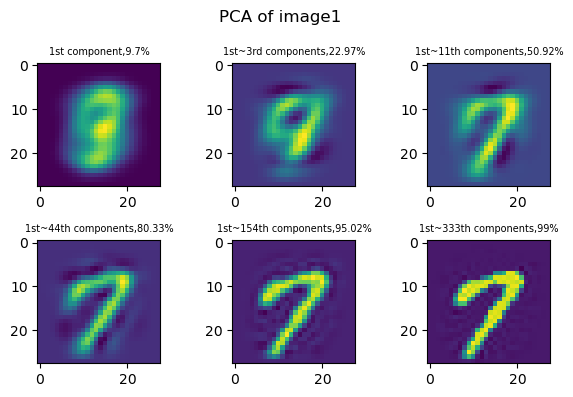

In [17]:
f, ax = plt.subplots(2, 3)

f.suptitle("PCA of image1", fontsize=12)

ax[0,0].imshow(pca1.inverse_transform(pca_1[15, :]).reshape(28, 28))
ax[0,1].imshow(pca2.inverse_transform(pca_2[15, :]).reshape(28, 28))
ax[0,2].imshow(pca3.inverse_transform(pca_3[15, :]).reshape(28, 28))
ax[1,0].imshow(pca4.inverse_transform(pca_4[15, :]).reshape(28, 28))
ax[1,1].imshow(pca5.inverse_transform(pca_5[15, :]).reshape(28, 28))
ax[1,2].imshow(pca6.inverse_transform(pca_6[15, :]).reshape(28, 28))

ax[0,0].set_title('1st component,9.7%',fontsize=7)
ax[0,1].set_title('1st~3rd components,22.97%',fontsize=7)
ax[0,2].set_title('1st~11th components,50.92%',fontsize=7)
ax[1,0].set_title('1st~44th components,80.33%',fontsize=7)
ax[1,1].set_title('1st~154th components,95.02%',fontsize=7)
ax[1,2].set_title('1st~333th components,99%',fontsize=7)

plt.tight_layout() 
plt.show()

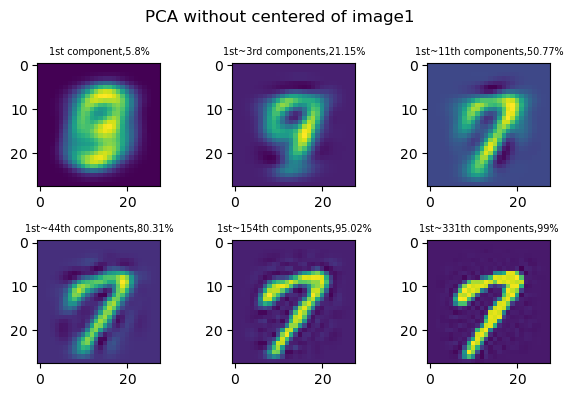

In [18]:
f, ax = plt.subplots(2, 3)

f.suptitle("PCA without centered of image1", fontsize=12)

ax[0,0].imshow(tsvd1.inverse_transform(tsvd_1)[15, :].reshape(28, 28))
ax[0,1].imshow(tsvd2.inverse_transform(tsvd_2)[15, :].reshape(28, 28))
ax[0,2].imshow(tsvd3.inverse_transform(tsvd_3)[15, :].reshape(28, 28))
ax[1,0].imshow(tsvd4.inverse_transform(tsvd_4)[15, :].reshape(28, 28))
ax[1,1].imshow(tsvd5.inverse_transform(tsvd_5)[15, :].reshape(28, 28))
ax[1,2].imshow(tsvd6.inverse_transform(tsvd_6)[15, :].reshape(28, 28))

ax[0,0].set_title('1st component,5.8%',fontsize=7)
ax[0,1].set_title('1st~3rd components,21.15%',fontsize=7)
ax[0,2].set_title('1st~11th components,50.77%',fontsize=7)
ax[1,0].set_title('1st~44th components,80.31%',fontsize=7)
ax[1,1].set_title('1st~154th components,95.02%',fontsize=7)
ax[1,2].set_title('1st~331th components,99%',fontsize=7)

plt.tight_layout() 
plt.show()

再来是第一张图'2'，可以从图的小标题看出主成分个数及其累计解释变异：
- PCA:    
    在44个主成分的累计解释变异高达80.33%时，可以明显看出此图为'2'
- PCA without centered:  
    在44个主成分的累计解释变异高达80.31%时，可以明显看出此图为'2'
    
一样是非常棒的降维效果，因为原始是784个特征，只要降至44个主成分就能达到差不多的效果

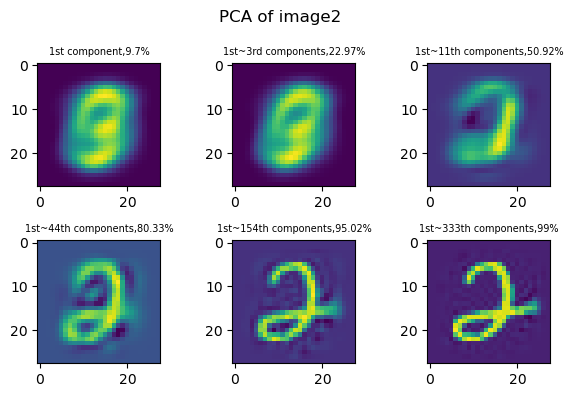

In [19]:
f, ax = plt.subplots(2, 3)

f.suptitle("PCA of image2", fontsize=12)

ax[0,0].imshow(pca1.inverse_transform(pca_1[16, :]).reshape(28, 28))
ax[0,1].imshow(pca2.inverse_transform(pca_2[16, :]).reshape(28, 28))
ax[0,2].imshow(pca3.inverse_transform(pca_3[16, :]).reshape(28, 28))
ax[1,0].imshow(pca4.inverse_transform(pca_4[16, :]).reshape(28, 28))
ax[1,1].imshow(pca5.inverse_transform(pca_5[16, :]).reshape(28, 28))
ax[1,2].imshow(pca6.inverse_transform(pca_6[16, :]).reshape(28, 28))

ax[0,0].set_title('1st component,9.7%',fontsize=7)
ax[0,1].set_title('1st~3rd components,22.97%',fontsize=7)
ax[0,2].set_title('1st~11th components,50.92%',fontsize=7)
ax[1,0].set_title('1st~44th components,80.33%',fontsize=7)
ax[1,1].set_title('1st~154th components,95.02%',fontsize=7)
ax[1,2].set_title('1st~333th components,99%',fontsize=7)

plt.tight_layout() 
plt.show()

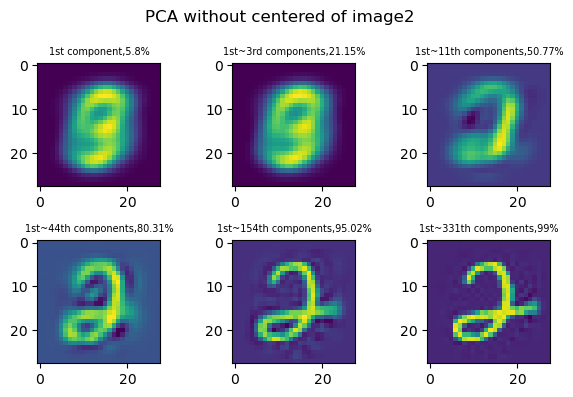

In [20]:
f, ax = plt.subplots(2, 3)

f.suptitle("PCA without centered of image2", fontsize=12)

ax[0,0].imshow(tsvd1.inverse_transform(tsvd_1)[16, :].reshape(28, 28))
ax[0,1].imshow(tsvd2.inverse_transform(tsvd_2)[16, :].reshape(28, 28))
ax[0,2].imshow(tsvd3.inverse_transform(tsvd_3)[16, :].reshape(28, 28))
ax[1,0].imshow(tsvd4.inverse_transform(tsvd_4)[16, :].reshape(28, 28))
ax[1,1].imshow(tsvd5.inverse_transform(tsvd_5)[16, :].reshape(28, 28))
ax[1,2].imshow(tsvd6.inverse_transform(tsvd_6)[16, :].reshape(28, 28))

ax[0,0].set_title('1st component,5.8%',fontsize=7)
ax[0,1].set_title('1st~3rd components,21.15%',fontsize=7)
ax[0,2].set_title('1st~11th components,50.77%',fontsize=7)
ax[1,0].set_title('1st~44th components,80.31%',fontsize=7)
ax[1,1].set_title('1st~154th components,95.02%',fontsize=7)
ax[1,2].set_title('1st~331th components,99%',fontsize=7)

plt.tight_layout() 
plt.show()

----
### 2 eigenvectors
PCA方法试图捕获最大方差的最优方向(特征向量)，下面描绘了PCA方法为MNIST生成的前100个最优方向或主成分轴(此时可解释变异为91.46%)。   
可以明显看出图片越趋复杂，当把第1个特征向量和第100个特征向量进行比较时，很明显，在寻找最大方差中生成了更复杂的方向或成分，从而使新特征子空间的方差最大化。   
此外，也能看出未中心化以及中心化的PCA的特征向量长相不同。

In [328]:
print('PCA eigenvector dim:',pca.components_.shape)
print('PCA without centered eigenvector dim:',tsvd.components_.shape)

PCA eigenvector dim: (333, 784)
PCA without centered eigenvector dim: (332, 784)


In [343]:
print('PCA 100th eigenvectors - cumulative explained variance ratio:', cumsum_pca[99]*100)
print('PCA without centered 100th eigenvectors - cumulative explained variance ratio:', cumsum_tsvd[99]*100)

PCA 100th eigenvectors - cumulative explained variance ratio: 91.46285724330632
PCA without centered 100th eigenvectors - cumulative explained variance ratio: 91.45978111497294


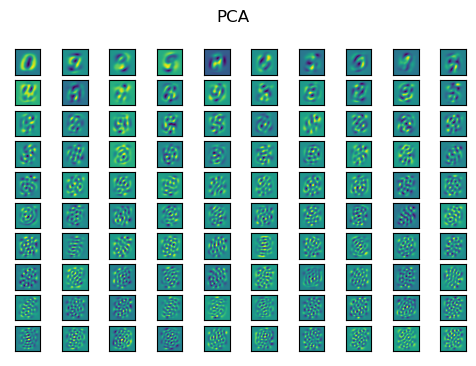

In [329]:
f, ax = plt.subplots(10, 10)

f.suptitle("PCA", fontsize=12)

a = [i for i in range(100)]
a = np.array(a).reshape(10,10)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(pca.components_[a[i][j]].reshape(28,28))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
plt.show()

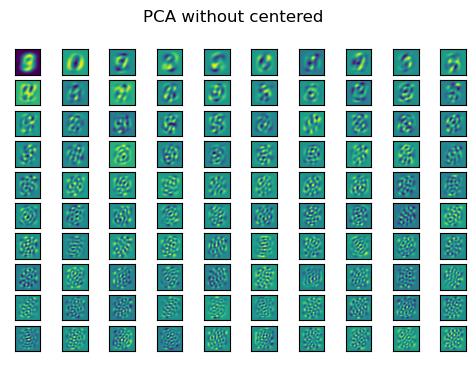

In [330]:
f, ax = plt.subplots(10, 10)

f.suptitle("PCA without centered", fontsize=12)

a = [i for i in range(100)]
a = np.array(a).reshape(10,10)
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(tsvd.components_[a[i][j]].reshape(28,28))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
plt.show()

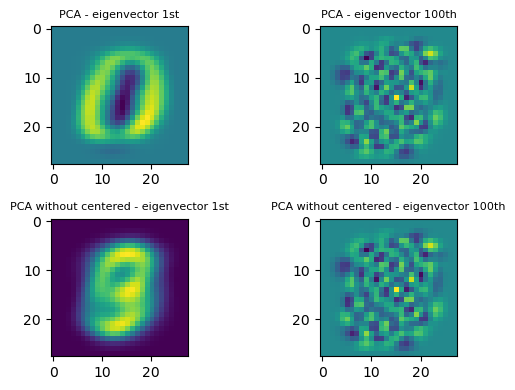

In [333]:
f, ax = plt.subplots(2, 2)

ax[0,0].imshow(pca.components_[0,:].reshape(28,28))
ax[0,1].imshow(pca.components_[100,:].reshape(28,28))
ax[1,0].imshow(tsvd.components_[0,:].reshape(28,28))
ax[1,1].imshow(tsvd.components_[100,:].reshape(28,28))
ax[0,0].set_title('PCA - eigenvector 1st',fontsize = 8)
ax[0,1].set_title('PCA - eigenvector 100th',fontsize = 8)
ax[1,0].set_title('PCA without centered - eigenvector 1st',fontsize = 8)
ax[1,1].set_title('PCA without centered - eigenvector 100th',fontsize = 8)
plt.tight_layout() 
plt.show()

----
### 3 conclusion
此数据其实比较适合PCA without centering the dataset，尽管可能是否中心化在此题并无太明显的对比，然而要注意到的是此数据实际上是稀疏矩阵，举例来说，列出其中一个图片来看，可以明显看出其稀疏性，而做中心化会破坏矩阵的稀疏性   
既然如此，为何PCA总是要做中心化呢？原因是因为PCA是为了寻找最大方差来获得主成分，以达到降维的目的，因此并不能说PCA是习惯做中心化，而该说去中心化才能求变异已推出PCA的结果   
SVD则是和PCA不同的一个概念，有趣的是，若在做SVD前先对数据做中心化的预处理，其结果会和PCA等价，因此使用SVD来求解PCA便成为另一种大众所习惯的方法。正如最一开始提到的，若做中心化则稀疏性会被破坏，因此若遇到稀疏矩阵，可以移除PCA过程中对SVD所做的中心化预处理，以保留稀疏性来做后续的降维。最后也能看出两个方法从eigenvector到累计解释变异均不同，其中到非常高的累积解释变异时，才会显现出PCA without centering the dataset需要的主成分较少，但差距十分些微不明显

In [321]:
train_images[15,:] #稀疏矩陣

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

若中心化则破坏了稀疏性：

In [323]:
train_images[15,:] - np.mean(train_images[15,:])

array([[-32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612],
       [-32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -32.26530612, -32.26530612],
       [-32.26530612, -32.26530612, -32.26530612, -32.26530612,
        -32.26530612, -32.26530612, -3

--------
# 2 Learning Theory

## Problem 2
### General setting of learning

已知$Z = data \ space, \\ H = hypothesis \ space, \\ l = H \ × \ Z \rightarrow [0, \infty)\ =  loss \ function$ 其中$l$可用来衡量$h\in H$在$z \in Z$的表现

现有一回归模型以及模型的$square \ error$，下面展示此回归模型的$General \ setting \ of \ learning$：   
   
   
$Let \ X = input \ space, \ Y \subseteq \mathbb{R}= output space \\ \Rightarrow Z = X \ × \ Y = (X,Y) \\ H = \{f:X\rightarrow w^TX+b = \hat{Y}\} \\  l = H \ × \ Z = l(h,(x,y)) = l(h(x),y) = l(\hat{y},y) = (\hat{y}-y)^2, \\ \forall h\in H, \ (x,y) \in (X,Y)$

--------
## Problem 3
### Generalization error with random labels

已知$Z = X \ × \{0,1\}, \\ H = \{f : f \ is \ a \ mapping \ from \ X \ to \ \{0,1\}\}, \\ l(h,z) = l(h,(x,y)) = I_{h(x)\neq y}, \\ D = distribution \ of \ Z \  with \ equal \ probability \Rightarrow X \sim Ber(0.5), \\ R(h,D) \cong E_{z \sim D}[l(h,z)]$   

下证$generalization \ error \ R(h, D)$永远是$\frac{1}{2}$:   
    
    
已知$D:X \sim Ber(0.5) \Rightarrow p_{z \sim D}(x,0) = p_{z \sim D}(x,1) = 0.5,\\ R(h,D) \\ \cong E_{z \sim D}[l(h,z)] \\ = E_{z \sim D}[I_{h(x)\neq y}] \\ = \sum_{x,y \in X,Y}I_{h(x)\neq y}p_{z \sim D}(x,y)$       
    
    
且知$I_{h(x)\neq y} = \begin{cases} 1, \ if h(x)\neq y  \\ 0, \ if h(x) =  y \end{cases}$,    $\forall \ (h(x),y) = \{(0,0),(0,1),(1,0),(1,1)\}$     
    
    
故$R(h,D) = \sum_{x,y \in X,Y}I_{h(x)\neq y}p_{z \sim D}(x,y) \\ = I_{h(x)=0,y=1}p_{z \sim D}(x,1) + I_{h(x)=1,y=0}p_{z \sim D}(x,0) = \frac{1}{4}+\frac{1}{4} = \frac{1}{2}$   
   
   
$R(h, D)$永远是$\frac{1}{2}$得证

--------
## Problem 4
### Bound the generalization error  of ERM
### 1

已知$Empirical \ Error = \hat{R}(h,S) \cong \frac{1}{m}\sum_{i=1}{m}l(h,z_i), \ \forall \ S = (z_1,z_2,...,z_m)\in Z^m, \\ R^* \cong inf_{h\in H}R(h,D) = R(h^*,D) \ \forall \ Z \sim D, \\ empirical \ error \ minimization (ERM) =  \hat{R}(h_s^{ERM},S), \ \forall \ h_s^{ERM} \in argmin_{h\in H}l(h,S)$   

下证$R(h_s^{ERM},D) - R^* \leq 2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid$:   
   
   
   
      
$R(h_s^{ERM},D) - R^* \\ = R(h_s^{ERM},D) - R(h^*,D) \\ = [R(h_s^{ERM},D) - \hat{R}(h_s^{ERM},D)] + [\hat{R}(h_s^{ERM},D) - R(h^*,D)] \\ \leq [R(h_s^{ERM},D) - \hat{R}(h_s^{ERM},D)] + [\hat{R}(h^*,D) - R(h^*,D)]  \ \ (\because \hat{R}(h^*,D)>\hat{R}(h_s^{ERM},D)) \\ \leq \mid R(h_s^{ERM},D) - \hat{R}(h_s^{ERM},D)\mid + \mid R(h^*,D) - \hat{R}(h^*,D)\mid \\ \leq 2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid$    
   
   
$R(h_s^{ERM},D) - R^* \leq 2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid$得证

### 2

已知$H$是有限集合，且$l\leq M$   
    
    
### 2.1 欲证$\forall \epsilon>0, \ p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2})$   
   
    
已知$R(h_s^{ERM},D) - R^* \leq 2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid$   
$\Rightarrow p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq p_{s\sim D^m}(2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon) \\ \Rightarrow 欲证p_{s\sim D^m}(2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon)  \leq 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2})$   
   
    
$p_{s\sim D^m}(2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon) \\ = p_{s\sim D^m}(2\mid R(h_1,D)-\hat{R}(h_1,S)\mid > \epsilon \ \vee \ ... \ \vee \ 2\mid R(h_{|H|},D)-\hat{R}(h_{|H|},S)\mid > \epsilon) \\ \leq \sum_{h \in H}p_{s\sim D^m}(2\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon)-(1)$   
   
   
$By \ Hoeffding’s \ inequality,\  \begin{cases} p(\mu - \frac{1}{m}\sum_{i=1}^mX_i>\epsilon)\leq exp(-\frac{2m\epsilon^2}{(b-a)^2}), \ \forall \ X_i\in [a,b],\ a<b \\  p(\frac{1}{m}\sum_{i=1}^mX_i-\mu>\epsilon)\leq exp(-\frac{2m\epsilon^2}{(b-a)^2}), \ \forall \ X_i\in [a,b],\ a<b \end{cases}  \\ \Rightarrow p_{s\sim D^m}(2\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon) \\ = p_{s\sim D^m}(2R(h,D)-2\hat{R}(h,S)> \epsilon) + p_{s\sim D^m}(2\hat{R}(h,S)-2R(h,D) > \epsilon) \\ = p_{s\sim D^m}(2\mu_l-2\frac{1}{m}\sum_{i=1}^ml(h,z_i)> \epsilon)+p_{s\sim D^m}(2\frac{1}{m}\sum_{i=1}^ml(h,z_i)-2\mu_l> \epsilon) \\ =  p_{s\sim D^m}(\mu_{2l}-\frac{1}{m}\sum_{i=1}^m2l(h,z_i)> \epsilon)+p_{s\sim D^m}(\frac{1}{m}\sum_{i=1}^m2l(h,z_i)-\mu_{2l}> \epsilon) \\ \because 0<2l\leq 2M \therefore (b-a)^2 = 4M^2 \\ \Rightarrow p_{s\sim D^m}(\mu_{2l}-\frac{1}{m}\sum_{i=1}^m2l(h,z_i)> \epsilon)+p_{s\sim D^m}(\frac{1}{m}\sum_{i=1}^m2l(h,z_i)-\mu_{2l}> \epsilon) \\ \leq exp(-\frac{2m\epsilon^2}{4M^2})+exp(-\frac{2m\epsilon^2}{4M^2}) \\ = 2exp(-\frac{m\epsilon^2}{2M^2})-(2)$   
   
   
$By \ (1) \ \&\ (2), \\ p_{s\sim D^m}(2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon)\\ \leq \sum_{h \in H}p_{s\sim D^m}(2\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon) \\ = 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2}) \\ \Rightarrow p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq p_{s\sim D^m}(2sup_{h\in H}\mid R(h,D)-\hat{R}(h,S)\mid > \epsilon) \leq 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2}) \\ \Rightarrow \ p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2})得证$

### 2.2  欲证$\forall \delta \in (0,1), \ p_{s\sim D^m}(R(h_s^{ERM},D) \leq R^* + \sqrt{\frac{2M^2(\ln2|H|+\ln\delta^{-1})}{m}}) \geq 1-\delta$     
   
   
已知$p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2})$，且$p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon)\in(0,1)$   
可令$2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2}) = \delta \in (0,1) \\ \Rightarrow p_{s\sim D^m}(R(h_s^{ERM},D) - R^* > \epsilon) \leq \delta \\ \Rightarrow  p_{s\sim D^m}(R(h_s^{ERM},D) - R^* \leq \epsilon) \geq 1-\delta \\ \Rightarrow  p_{s\sim D^m}(R(h_s^{ERM},D) \leq R^* + \epsilon) \geq 1-\delta-(1)$   
   
   
接着求$\epsilon, \ \because 2\mid H\mid exp(-\frac{m\epsilon^2}{2M^2}) = \delta \in (0,1) \\ \Rightarrow \frac{2\mid H\mid}{exp(\frac{m\epsilon^2}{2M^2})} = \delta \\ \Rightarrow \delta{exp(\frac{m\epsilon^2}{2M^2})} = 2\mid H\mid \\ \Rightarrow exp(\frac{m\epsilon^2}{2M^2}) = 2\mid H\mid\frac{1}{\delta} \\ \Rightarrow \frac{m\epsilon^2}{2M^2} = \ln2\mid H\mid+\ln\frac{1}{\delta} \\ \Rightarrow \epsilon^2 = \frac{2M^2}{m}[\ln2\mid H\mid+\ln\frac{1}{\delta}] \\ \Rightarrow \epsilon = \sqrt{\frac{2M^2(\ln2\mid H\mid+\ln\frac{1}{\delta})}{m}}-(2)$   
   
   
把$(2)$代入$(1)$，$p_{s\sim D^m}(R(h_s^{ERM},D) \leq R^* + \epsilon) \geq 1-\delta \\ \Rightarrow p_{s\sim D^m}(R(h_s^{ERM},D) \leq R^* + \sqrt{\frac{2M^2(\ln2\mid H\mid+\ln\delta^{-1})}{m}}) \geq 1-\delta得证$

--------
# 3 Deep Generative Models

## Problem 5
### Gaussian VAE vs Bernoulli VAE

### 1  
这张图是设定$dim \ of\ z=40, \ MLP = Bernoulli$，并画出前十个MNIST里面的图，来看下重建的效果，其中可以从$Epoch, \ Batch \ Loss, \ Average \ Loss$的数值了解到随着$Epoch$的提升，$Loss\ function$的值会下降，所以若希望重建出来的效果更好，可以提升$Epoch$

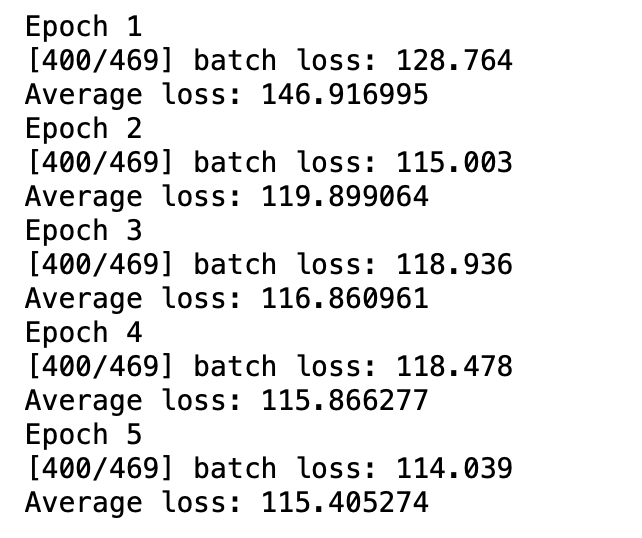

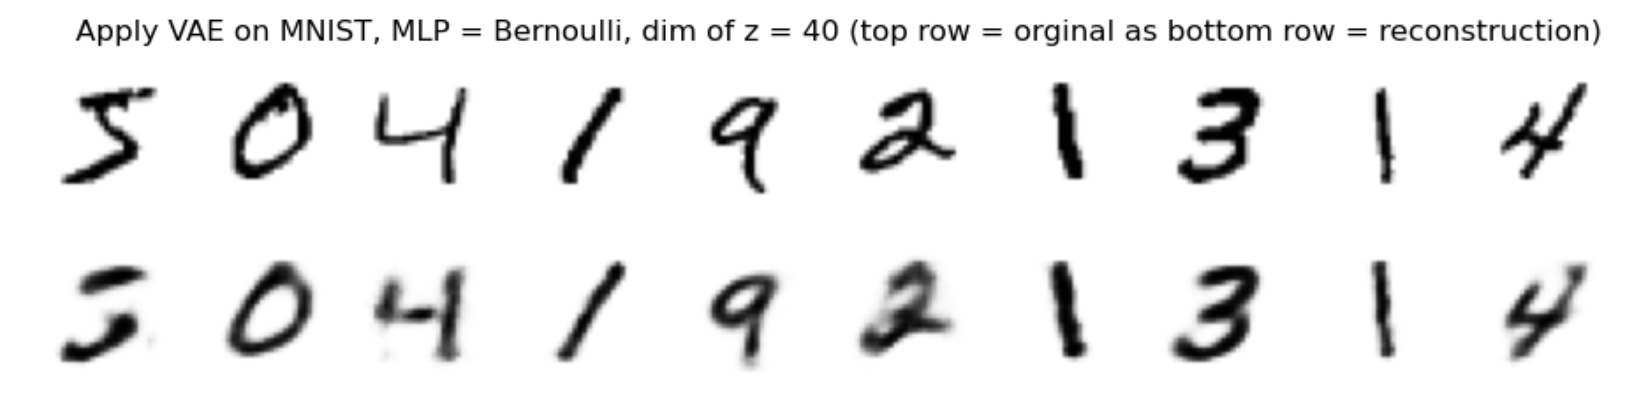

### 2
接着一样设定$dim \ of\ z=40, \ MLP = Gaussian$，并画出前十个MNIST里面的图，来看下重建的效果   

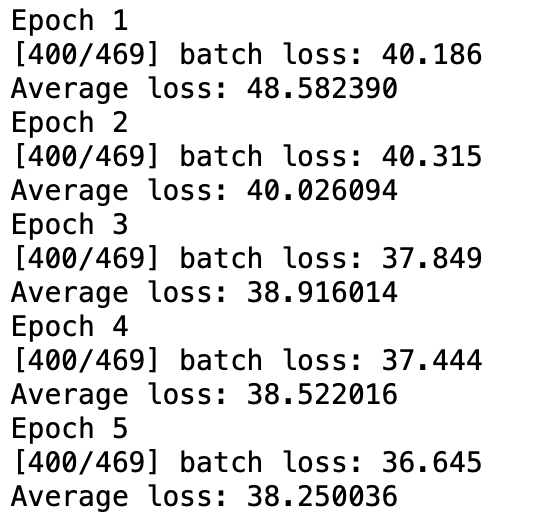

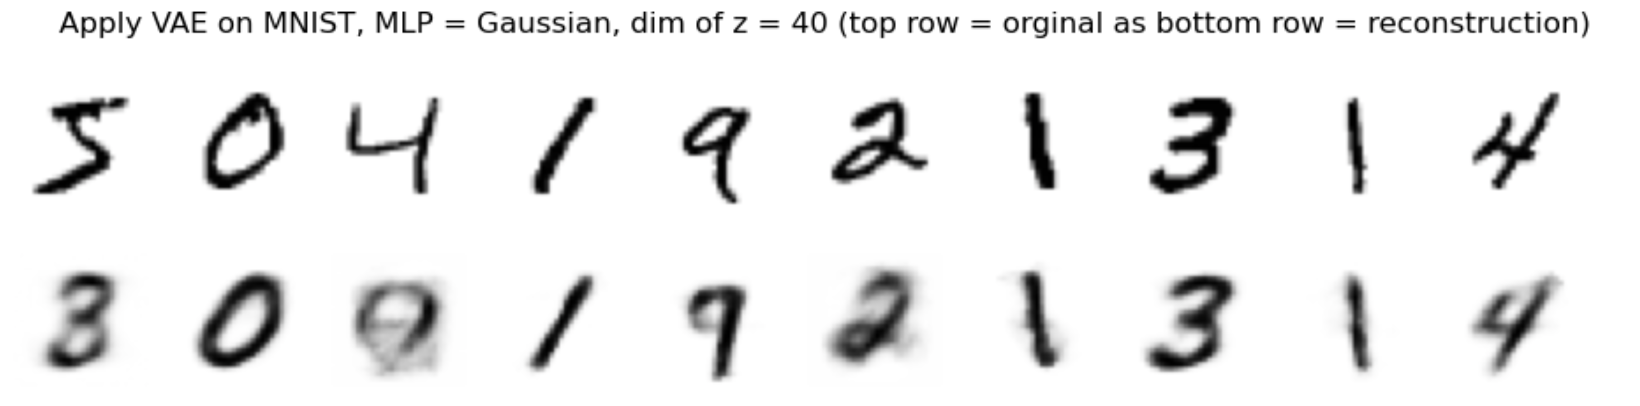

### 3   
关于此题两个$VAE$，设定一样的$dim \ of \ z$、$Epoch$   
- $Loss \ function$   
  $MLP=Gaussian$比$MLP=Bernoulli$来得低
- 图片重建效果
  $MLP=Gaussian$比$MLP=Bernoulli$来得不清晰   
  
   
   
根据这个结果，我的想法是通常图片的值是二元的，我们看到的图片是以二进位制形成，虽然不完全像是Bernoulli一样只有0或1两个label，但仍然可以说接近binary的data形式（相较其他例如股票预测data来说），因此即便$MLP=Gaussian$的$Loss \ function$比$MLP=Bernoulli$来得低，对于为图片数据集的MNIST来说，考量图片结构会导致$MLP=Gaussian$的重建效果比$MLP=Bernoulli$来得不佳，因此我个人会倾向选择$MLP=Bernoulli$于MNIST的应用

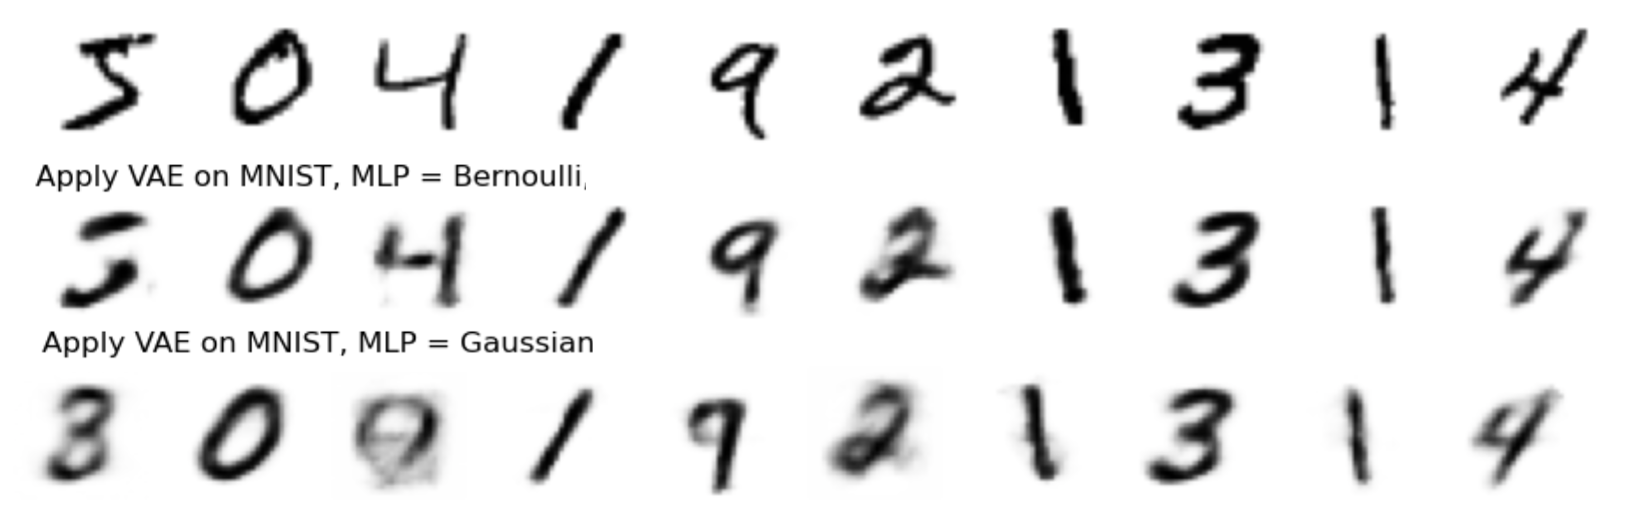